In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score

%matplotlib inline
pd.set_option('display.max_columns', None)

## Questions:
1. If we want to run airbnb business, how to get better price in seattle?
2. How to get better reviews?
3. How is demand changing over time?

In [2]:
seattle_listing = pd.read_csv('./seattle/listings.csv')
seattle_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [14]:
seattle_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [37]:
seattle_review = pd.read_csv('./seattle/reviews.csv')
seattle_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [38]:
seattle_calendar = pd.read_csv('./seattle/calendar.csv')
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


## Question 1: If we want to run airbnb business, how to get better price in seattle?

To answer this question, I will look into column "price", and find the relative columns to it.

Potiential columns could be neighbourhood_cleansed, accommodates, property_type, room_type, bedrooms, amenities etc.

In [3]:
sldf = seattle_listing[["price", "neighbourhood_cleansed", "property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "amenities", ]]

In [4]:
sldf.head()

,price,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities
0,$85.00,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,$150.00,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,$975.00,West Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,$100.00,West Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,$450.00,West Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."


In [17]:
set(sldf.property_type.values)

{'Apartment',
 'Bed & Breakfast',
 'Boat',
 'Bungalow',
 'Cabin',
 'Camper/RV',
 'Chalet',
 'Condominium',
 'Dorm',
 'House',
 'Loft',
 'Other',
 'Tent',
 'Townhouse',
 'Treehouse',
 'Yurt',
 nan}

In [15]:
def cleandf(df):
    ndf = df.copy()
    ndf['price'] = ndf['price'].replace('[\$,]', '', regex=True).astype(np.float)
    ndf = ndf.dropna(subset=['price'], axis=0)

    ndf['TV'] = ndf.amenities.str.contains("tv", case=False).astype(int)
    ndf['Internet'] = ndf.amenities.str.contains('internet|wireless', case=False).astype(int)
    ndf['Parking'] = ndf.amenities.str.contains('parking', case=False).astype(int)
    ndf['Washer'] = ndf.amenities.str.contains('washer', case=False).astype(int)
    ndf['Dryer'] = ndf.amenities.str.contains('dryer', case=False).astype(int)
    ndf['AirCon'] = ndf.amenities.str.contains('air condition|air conditioning', case=False).astype(int)
    ndf = ndf.drop(['amenities'], axis=1)

    num_vars = ndf.select_dtypes(include=['int', 'float']).columns
    
    for col in num_vars:
        ndf[col].fillna((ndf[col].mean()), inplace=True)
    
    cat_vars = ndf.select_dtypes(include=['object']).columns
    
    for var in cat_vars:
        ndf = pd.concat([ndf.drop([var], axis=1), pd.get_dummies(ndf[var], drop_first=True)], axis=1)
    
    return ndf

In [6]:
cdf = cleandf(sldf)
cdf.head()

,price,accommodates,bathrooms,bedrooms,beds,TV,Internet,Parking,Washer,Dryer,AirCon,Alki,Arbor Heights,Atlantic,Belltown,Bitter Lake,Briarcliff,Brighton,Broadview,Broadway,Bryant,Cedar Park,Central Business District,Columbia City,Crown Hill,Dunlap,East Queen Anne,Eastlake,Fairmount Park,Fauntleroy,First Hill,Fremont,Gatewood,Genesee,Georgetown,Green Lake,Greenwood,Haller Lake,Harrison/Denny-Blaine,High Point,Highland Park,Holly Park,Industrial District,Interbay,International District,Laurelhurst,Lawton Park,Leschi,Lower Queen Anne,Loyal Heights,Madison Park,Madrona,Mann,Maple Leaf,Matthews Beach,Meadowbrook,Mid-Beacon Hill,Minor,Montlake,Mount Baker,North Admiral,North Beach/Blue Ridge,North Beacon Hill,North College Park,North Delridge,North Queen Anne,Olympic Hills,Phinney Ridge,Pike-Market,Pinehurst,Pioneer Square,Portage Bay,Rainier Beach,Ravenna,Riverview,Roosevelt,Roxhill,Seaview,Seward Park,South Beacon Hill,South Delridge,South Lake Union,South Park,Southeast Magnolia,Stevens,Sunset Hill,University District,Victory Heights,View Ridge,Wallingford,Wedgwood,West Queen Anne,West Woodland,Westlake,Whittier Heights,Windermere,Yesler Terrace,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Chalet,Condominium,Dorm,House,Loft,Other,Tent,Townhouse,Treehouse,Yurt,Private room,Shared room
0,85.0,4,1.0,1.0,1.0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,150.0,4,1.0,1.0,1.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,975.0,11,4.5,5.0,7.0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,100.0,3,1.0,0.0,2.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,450.0,6,2.0,3.0,3.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [7]:
#Split into train and test
x_train, x_test, y_train, y_test = train_test_split(cdf.drop(["price"], axis=1), cdf["price"], test_size = .30, random_state=42)
model = LinearRegression(normalize=True) # Instantiate
model.fit(x_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [8]:
#Predict and score the model
y_preds = model.predict(x_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_preds), len(y_test))

'The r-squared score for your model was 0.591369133874716 on 1146 values.'

In [9]:
def coef_weights(coefficients, x_train):
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = x_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [10]:
coef_df = coef_weights(model.coef_, cdf.drop(["price"], axis=1))

In [11]:
coef_df.head(30)

,est_int,coefs,abs_coefs
97,Boat,148.219780,148.219780
41,Industrial District,91.156604,91.156604
69,Pioneer Square,85.423797,85.423797
70,Portage Bay,84.526345,84.526345
103,Dorm,-83.757341,83.757341
82,Southeast Magnolia,81.516750,81.516750
67,Pike-Market,74.214543,74.214543
112,Shared room,-70.711748,70.711748
92,Westlake,68.996247,68.996247
90,West Queen Anne,64.570430,64.570430


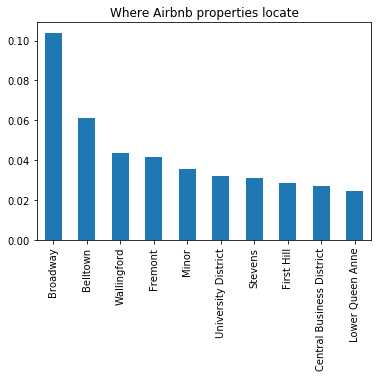

In [14]:
loc_vals = sldf['neighbourhood_cleansed'].value_counts()
(loc_vals[0:10]/sldf.shape[0]).plot(kind="bar");
plt.title("Where Airbnb properties locate");

## Conclusion:

From what we observe above, the location maybe the more important factor that affects the price. Property in Industrial District, Pioneer Square and Portage Bay get paid by higher price than other locations. While other locations like South Park will lower the price.

Besides the location, room_type and property_type also affects the price, dorm and shared room got lower price than others. while when your property is a boat or a treehouse, it's absolutely an attractive property in the airbnb market.

Whilist the amentities won't affect the price as much as I thought, this might becasue much of the rooms have the same standard amentites.


# Question2: How to get better reviews?

This time I'm going to look into the columns related to "review_scores_rating", and figure out what aspects impact the most to customers' experience.

To answer this question, I will look into columns related to "review", like "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location" etc.

In [18]:
seattle_listing[['review_scores_rating', 'review_scores_accuracy']].head()

,review_scores_rating,review_scores_accuracy
0,95.0,10.0
1,96.0,10.0
2,97.0,10.0
3,NaN,NaN
4,92.0,9.0


In [22]:
[name for name in seattle_listing.columns if "review" in name]

['number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [31]:
def cleandf(df):
    df = df.copy()
    df = df.dropna(subset=['review_scores_rating'], axis=0)
    
    df = df[['review_scores_rating', 'review_scores_value', 'review_scores_accuracy', 'review_scores_cleanliness', 
             'review_scores_checkin', 'review_scores_communication', 'review_scores_location']].astype(float)
    
    num_vars = df.select_dtypes(include=['int', 'float']).columns
    
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    cat_vars = df.select_dtypes(include=['object']).columns
    
    for var in cat_vars:
        df = pd.concat([df.drop([var], axis=1), pd.get_dummies(df[var], drop_first=True)], axis=1)
    
    return df

In [32]:
cdf = cleandf(seattle_listing)
cdf.head()

,review_scores_rating,review_scores_value,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
0,95.0,10.0,10.0,10.0,10.0,10.0,9.0
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,92.0,9.0,9.0,9.0,10.0,10.0,9.0
5,95.0,10.0,10.0,10.0,10.0,10.0,10.0


In [33]:
#Split into train and test
x_train, x_test, y_train, y_test = train_test_split(cdf.drop(["review_scores_rating"], axis=1), cdf["review_scores_rating"], test_size = .30, random_state=42)
model = LinearRegression(normalize=True) # Instantiate
model.fit(x_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [35]:
coef_df = coef_weights(model.coef_, cdf.drop(["review_scores_rating"], axis=1))
coef_df.head(30)

,est_int,coefs,abs_coefs
0,review_scores_value,3.058346,3.058346
2,review_scores_cleanliness,2.352576,2.352576
1,review_scores_accuracy,1.526999,1.526999
3,review_scores_checkin,1.294785,1.294785
4,review_scores_communication,1.267077,1.267077
5,review_scores_location,0.533938,0.533938


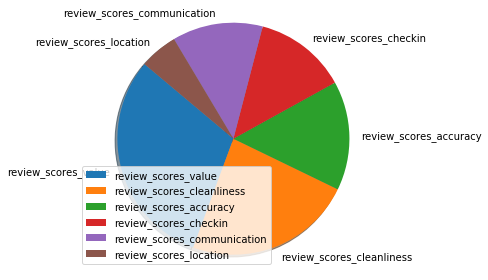

In [36]:
patches, texts = plt.pie(coef_df['abs_coefs'], labels=coef_df['est_int'], shadow=True, startangle=140)

plt.legend(patches, coef_df['est_int'], loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

## Conclusion:

As above diagram said, value and cleanliness are the top two factors that impact the overall review score. So to say, in order to get better customer experience, we have to make the room clean and value.

## Question 3: How is demand changing over time?

This question helps we predict when it's less demand and we can arange room maintaince time.

To answer this question, I will look into "calendar.csv" data, and calculate the availability_rate over the time.

In [50]:
df_calendar = seattle_calendar[seattle_calendar['available']=='t']

In [51]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [52]:
# how many and what columns do we have? How many rental houses are there? 
df_calendar_listing_id = df_calendar['listing_id'].value_counts().sort_values()
print("there are {} houses available in this dataset".format(len(df_calendar_listing_id)))

there are 3723 houses available in this dataset


In [53]:
# Time duration for this dataset
print("Date ranges from {} to {}".format(df_calendar['date'].min(),
                                                                df_calendar['date'].max()))

Date ranges from 2016-01-04 to 2017-01-02


In [54]:
# is there a price fluctuation as season changes? 
def price_mapper(price):
    """transform price's format from string to numerical number.
    ----------
    inputs：
        price -- string form of price in original data
    outputs:
        price -- float form of price being transformed
    """
    price = price.replace('$','')
    price = price.replace(',','')
    return float(price)

df_calendar['price'] = df_calendar['price'].map(price_mapper)

def month_mapper(date):
    """transfrom date from 'year-month-day' to 'year-month'
    ----------
    inputs:
        date -- date string form raw data
    outputs:
        month_year -- transformed time label
    """
    month_year = '-'.join(date.split('-')[:2])
    return month_year

df_calendar['year-month'] = df_calendar['date'].map(month_mapper)

/home/elynn/anaconda3/envs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/elynn/anaconda3/envs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
df_calendar.head()

,listing_id,date,available,price,year-month
0,241032,2016-01-04,t,85.0,2016-01
1,241032,2016-01-05,t,85.0,2016-01
9,241032,2016-01-13,t,85.0,2016-01
10,241032,2016-01-14,t,85.0,2016-01
14,241032,2016-01-18,t,85.0,2016-01


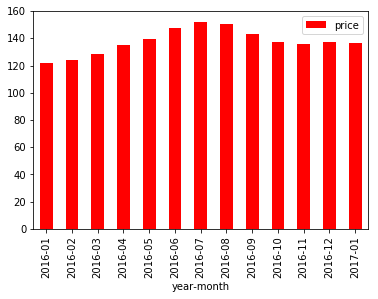

In [43]:
grouped = df_calendar.groupby('year-month')
df_month_price = pd.DataFrame(grouped['price'].mean()).reset_index()
df_month_price.plot.bar(x='year-month',y='price',color='red')

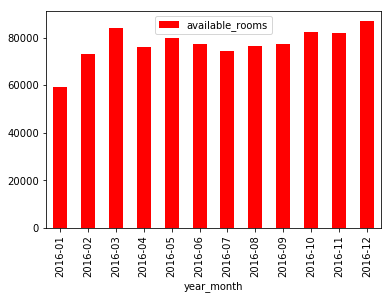

In [65]:
# how does demand distribute thoughout a year?
grouped = df_calendar.groupby('year-month')
# remove 2017-01 since data in that month was not completed
df_month_avail = pd.DataFrame(grouped['listing_id'].count()).reset_index()[:-1]
df_month_avail.columns = ['year_month','available_rooms']
df_month_avail.plot.bar(x='year_month',y='available_rooms',color='red')

## Conclusion:

Through above two diagrams, we could better understand the price and demand changing over seasons in a year. The available rooms in winer are higher than summer, means demands in winter are lower than summer, so is the price, we get higher price when demands are higher in summer.

